In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

#import seaborn as sns

In [10]:
import numpy as np
import h5py
from corner import corner
#from getdist import plots, MCSamples
#import getdist
from chainconsumer import ChainConsumer
from glob import glob

In [11]:
#test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'
#test_files = sorted(glob('../preds/*scattering*mcmc.hdf5'))
test_files = sorted(glob('/home/users/swmclau2/scratch/uatu_preds/*_v3.hdf5'))

In [12]:
print test_files

['/home/users/swmclau2/scratch/uatu_preds/adv_deep_resnet_reg_smooth_0.0_noise_0.0_04_v3.hdf5', '/home/users/swmclau2/scratch/uatu_preds/adv_deep_resnet_reg_smooth_1.0_noise_0.3_04_v3.hdf5', '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_shuffle_reg_smooth_0.0_noise_0.0_04_v3.hdf5', '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_shuffle_reg_smooth_1.0_noise_0.3_04_v3.hdf5']


In [13]:
#test_names = ['Adv. Resnet', 'Shuffled Resnet', 'Resnet', 'Gupta']
#test_names = ['Adv. Resnet', 'Resnet', 'Gupta']
#test_names = ['MCMC' for i in xrange(2)]
test_names = ['Adv. Resnet Noiseless', 'Adv. Resnet Noisy',
              'Shuffle Noiseless', 'Shuffle Noisy']

In [16]:
def get_outputs(test_path):

    with h5py.File(test_path, 'r') as f:
        print f.keys()
        output = f['chain'][:, :]
    return output, None

In [17]:
plot_idx = 0
outputs, truths = get_outputs(test_files[plot_idx])

[u'Om_0.149805_s8_1.037751', u'Om_0.163058_s8_0.654217', u'Om_0.166672_s8_0.800803', u'Om_0.170287_s8_0.820884', u'Om_0.175106_s8_0.967470', u'Om_0.177516_s8_0.638153', u'Om_0.199202_s8_0.772691', u'Om_0.200407_s8_1.063855', u'Om_0.201612_s8_0.632129', u'Om_0.204022_s8_0.863052', u'Om_0.206431_s8_0.840964', u'Om_0.207636_s8_0.875100', u'Om_0.211251_s8_1.023695', u'Om_0.225708_s8_0.802811', u'Om_0.228118_s8_0.873092', u'Om_0.231733_s8_0.744578', u'Om_0.232937_s8_0.706426', u'Om_0.234142_s8_1.075904', u'Om_0.241371_s8_0.634137', u'Om_0.247395_s8_1.013655', u'Om_0.251010_s8_0.828916', u'Om_0.253419_s8_0.770683', u'Om_0.257034_s8_0.897189', u'Om_0.261853_s8_0.853012', u'Om_0.279925_s8_0.846988', u'Om_0.283540_s8_0.686345', u'Om_0.289564_s8_1.007631', u'Om_0.295588_s8_1.051807', u'Om_0.304022_s8_0.939357', u'Om_0.317275_s8_0.716466', u'Om_0.323299_s8_0.792771', u'Om_0.326913_s8_0.838956', u'Om_0.328118_s8_0.678313', u'Om_0.334142_s8_1.093976', u'Om_0.335347_s8_1.033735', u'Om_0.344986_s8_0.

KeyError: "Unable to open object (object 'chain' doesn't exist)"

In [ ]:
names = ['Om', 's8']

In [ ]:
outputs.max(axis=0)

In [ ]:
outputs

In [ ]:
corner(outputs, truths=[0.279925, 0.846988]);

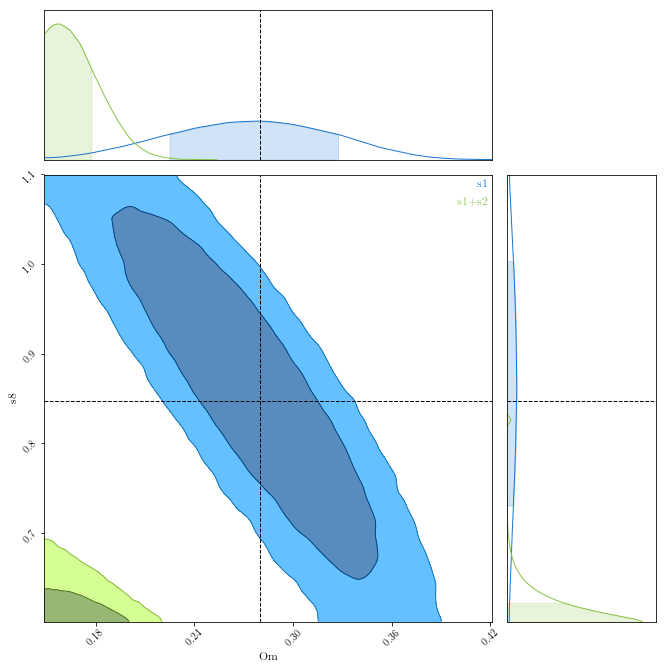

In [50]:
truth = [0.279925, 0.846988]
c.plotter.plot(figsize='PAGE', truth=truth);

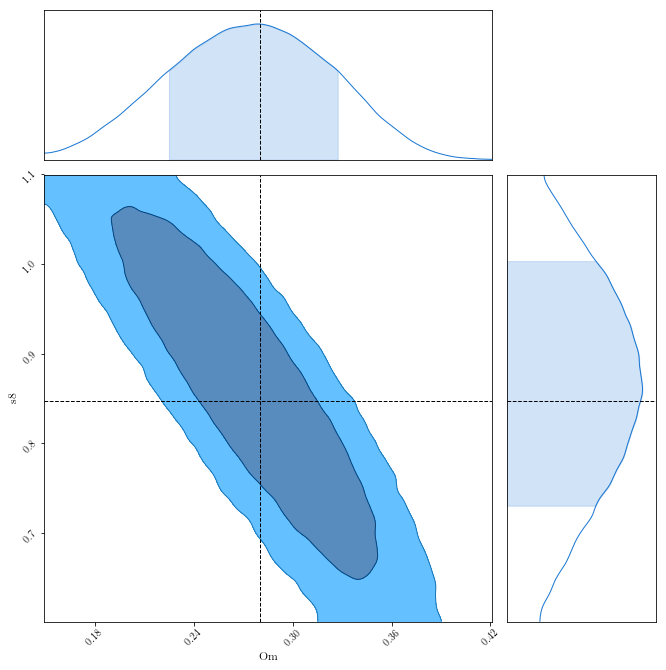

In [51]:
truth = [0.279925, 0.846988]
c.plotter.plot(chains=0,figsize='PAGE', truth=truth);

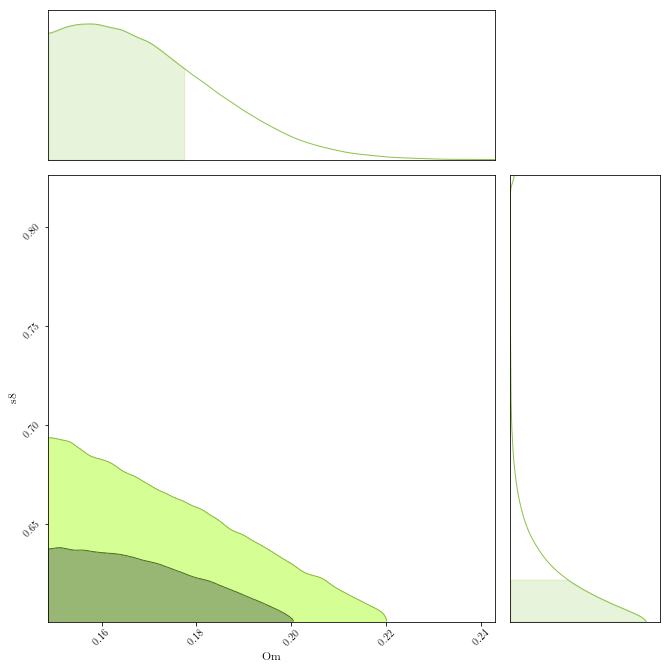

In [52]:
truth = [0.279925, 0.846988]
c.plotter.plot(chains=1,figsize='PAGE', truth=truth);